# Simple xG project

## Data Exploaration

Import libraries and functions

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import Pitch
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  

Import the dataset

In [171]:
df=pd.read_csv(r'C:\Users\Taha Sherif\OneDrive - New Giza University\education\Data analysis\xG Project\xg_model.csv')
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Explore the dimensions of a data set

In [172]:
df.shape

(8118, 25)

Explore the parameters of the dataset

In [173]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

Drop insignificant columns

In [174]:
df.drop(['DirectFreekick',"DirectCorner"],axis=1,inplace=True)
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [175]:
df=df[df["OwnGoal"]!=True]

Explore the columns

In [176]:
df.is_goal.value_counts()

is_goal
False    7097
True      994
Name: count, dtype: int64

In [177]:
df.Penalty.value_counts()

Penalty
True    106
Name: count, dtype: int64

Use matplot library for visualiztaion

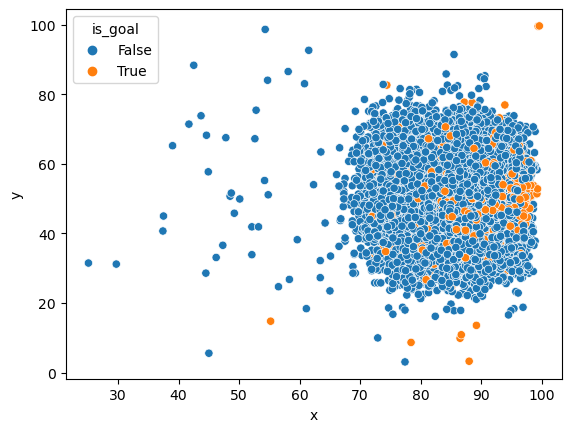

In [178]:

#plot x and y cordinates of each shot
sns.scatterplot(x="x", y="y", hue="is_goal", data=df)
plt.show()

Check for null values

In [179]:
df.isnull().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
OwnGoal            8091
OtherBodyPart      8067
dtype: int64

Replace null values with zeros

In [180]:
df.fillna(0,inplace=True)
df.isnull().sum()

x                  0
y                  0
is_goal            0
period             0
Assisted           0
Zone               0
IndividualPlay     0
RegularPlay        0
LeftFoot           0
RightFoot          0
FromCorner         0
FirstTouch         0
Head               0
BigChance          0
SetPiece           0
Volley             0
FastBreak          0
ThrowinSetPiece    0
Penalty            0
OneOnOne           0
KeyPass            0
OwnGoal            0
OtherBodyPart      0
dtype: int64

Change type of needed data

In [181]:
df["period"] = df["period"].astype('string')
df["Zone"] = df["Zone"].astype('string')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('bool')

df["OwnGoal"]=df["OwnGoal"].astype('bool')
df.dtypes

x                         float64
y                         float64
is_goal                      bool
period             string[python]
Assisted                     bool
Zone               string[python]
IndividualPlay               bool
RegularPlay                  bool
LeftFoot                     bool
RightFoot                    bool
FromCorner                   bool
FirstTouch                   bool
Head                         bool
BigChance                    bool
SetPiece                     bool
Volley                       bool
FastBreak                    bool
ThrowinSetPiece              bool
Penalty                      bool
OneOnOne                     bool
KeyPass                      bool
OwnGoal                      bool
OtherBodyPart                bool
dtype: object

Plot count of each shot distance

In [182]:
df["shot_distance"]=((100-df["x"])**2+(50-df["y"])**2)**0.5

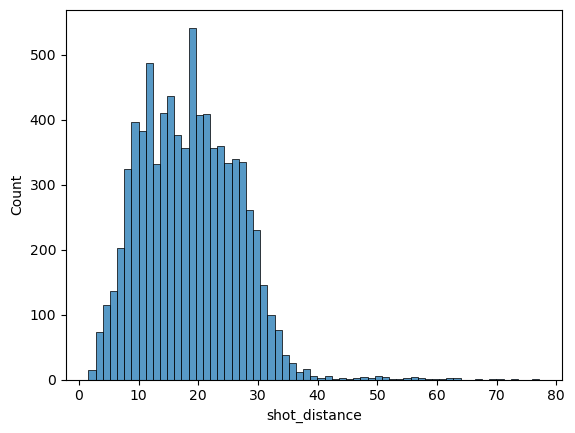

In [183]:
#plot distane of each shot using a suitable graph using a histogram
sns.histplot(x="shot_distance", data=df)
plt.show()


Trying to understand shot distance variable

In [184]:
df["shot_distance"].describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

Convert Period and Zone columns to categorial columns

In [185]:
df["period"] = df["period"].astype('str')
df["Zone"] = df["Zone"].astype('str')
df=pd.get_dummies(df,columns=["period","Zone"])
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal', 'OtherBodyPart',
       'shot_distance', 'period_FirstHalf', 'period_SecondHalf', 'Zone_Back',
       'Zone_Center', 'Zone_Left', 'Zone_Right'],
      dtype='object')

# Model fitting

Train the model

In [186]:
x=df.drop(["is_goal"],axis=1)
y=df["is_goal"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_pred_proba=model.predict_proba(x_test)[:,1]
y_pred_proba[0:10]




array([0.0394776 , 0.08459725, 0.79080121, 0.06965182, 0.44893408,
       0.05440865, 0.01386986, 0.8027775 , 0.04911552, 0.03888078])

In [187]:
final_df=x_test.copy()
final_df["Goal_proabability"]=y_pred_proba
final_df.head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,OwnGoal,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,Goal_proabability
2048,79.3,30.6,True,True,True,True,False,False,False,False,...,False,False,28.369878,False,True,False,True,False,False,0.039478
3491,85.8,49.7,True,False,True,True,False,False,False,False,...,False,False,14.203169,True,False,False,True,False,False,0.084597
3744,88.5,50.0,False,False,False,False,True,False,False,False,...,False,False,11.500000,False,True,False,True,False,False,0.790801
5862,76.5,48.1,False,True,True,True,False,False,False,False,...,False,False,23.576683,False,True,False,True,False,False,0.069652
4198,92.2,48.2,True,False,True,False,True,False,True,False,...,False,False,8.004998,False,True,False,True,False,False,0.448934


Sort Values according to Goal Probabiity

In [188]:
final_df=final_df.sort_values(by="Goal_proabability",ascending=False)

Remove duplicated rows

In [ ]:
#remove duplicated rows
final_df.drop_duplicates(inplace=True)
final_df.head()


(1594, 28)


,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,OwnGoal,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,Goal_proabability
5756,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.500000,True,False,False,True,False,False,0.805217
7504,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.500000,False,True,False,True,False,False,0.802777
5975,88.5,50.0,False,False,False,False,True,False,False,False,...,False,False,11.500000,True,False,False,True,False,False,0.793351
4957,88.5,50.0,False,False,False,False,True,False,False,False,...,False,False,11.500000,False,True,False,True,False,False,0.790801
7377,97.3,49.7,True,False,False,False,True,False,False,False,...,False,False,2.716616,False,True,False,True,False,False,0.650006


In [190]:

a=log_loss(y_test,y_pred_proba)
b=brier_score_loss(y_test,y_pred_proba)

c=roc_auc_score(y_test,y_pred_proba)
print(f"log_loss is {a} \nbrier_score_loss is {b} \nroc_auc_score is {c}")


log_loss is 0.2723518251969064 
brier_score_loss is 0.07937463816960895 
roc_auc_score is 0.8430568311485904


Visualize the data on a footbal field

In [191]:

pitch=Pitch(pitch_type="opta")

In [192]:

colors=['red','yellow','green']
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)


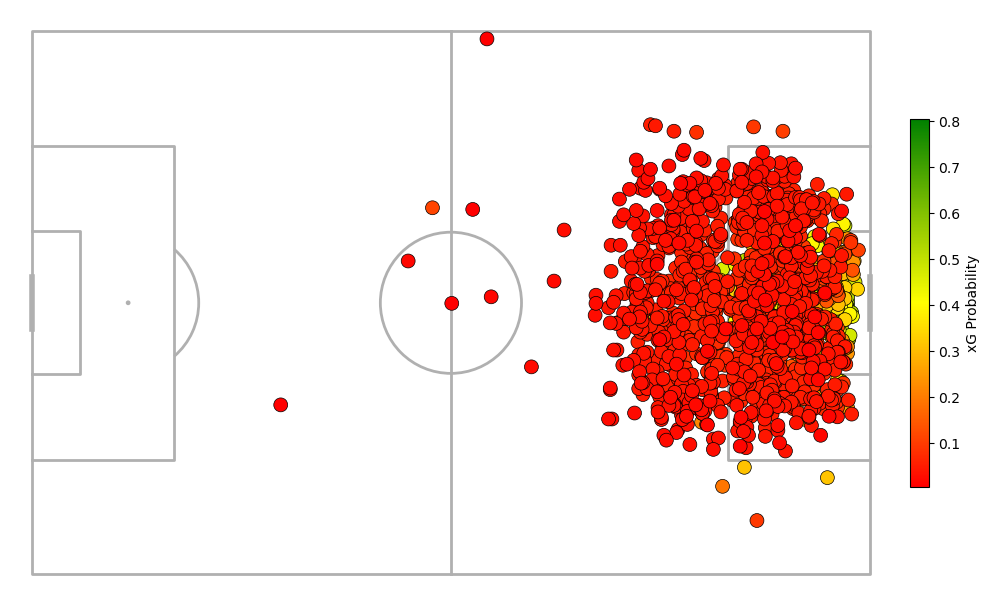

In [193]:
fig,ax = pitch.draw(figsize=(10,8))
sc = pitch.scatter(
    final_df['x'], 
    final_df['y'],  # Shot coordinates
    c=final_df['Goal_proabability'],  # xG probabilities for color
    cmap=cmap,  # Red to green gradient
    edgecolors='black', linewidth=0.5, s=100,  # Point styling
    ax=ax
)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('xG Probability')


Check for top 100 shots with highest goal probability

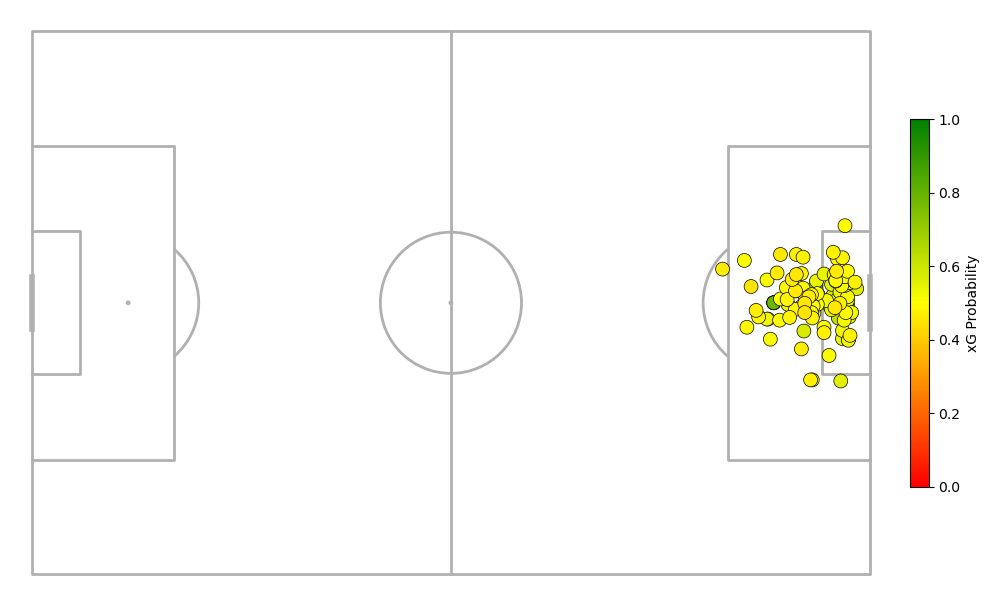

In [194]:
# I want to get the top 10 shots with the highest xG probabilities
top_shots = final_df.nlargest(100, 'Goal_proabability')
top_shots
fig,ax = pitch.draw(figsize=(10,8))
sc = pitch.scatter(
    top_shots['x'],
    top_shots['y'],  # Shot coordinates
    c=top_shots['Goal_proabability'],  # xG probabilities for color
    cmap=cmap,  # Red to green gradient
    edgecolors='black', linewidth=0.5, s=100,  # Point styling
    ax=ax,
    vmin=0,  # Set the minimum value for the color scale to 0
    vmax=1   # Set the maximum value for the color scale to 1
)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('xG Probability')
